<a href="https://colab.research.google.com/github/h0w4rds/brief-analysis/blob/main/analyzing_a-b-n_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A/B/n Tests**


After reading section 4.3 and these notes you will be able to


*   Analyze a test where there are more than two levels of a treatment, for example an A/B/C test.
* Know when to use an ANOVA to analyze A/B/n tests.
* Know when to use a Chi-square test to Analyze A/B/n tests.
*   Perform an ANOVA analysis in R.
* Perform a Chi-square analysis in R. 
*  Understand why we need to use Tukey HSD test to compare all pairs.
* Understand how to perform a Tukey HSD test in R. 

**Datasets:**

You will need the "humana_small.csv" and the "humana_rate.csv" datasets.








What happens when the treatment has more than two levels?  Suppose you want to test three landing pages, or four, or n landing pages.  
 
This is easily done, however the analysis and power calculations are different.  We no longer use a t-test or a test of proportions, we need to use an ANOVA or a Chi-Sqare test. 
 
This type of experiment, where we have multiple levels of a treatment is often referred to a completely randomized design.


# **A/B/n for difference in Means**

They used the following three banners on their landing pages.   The first one was the control. 

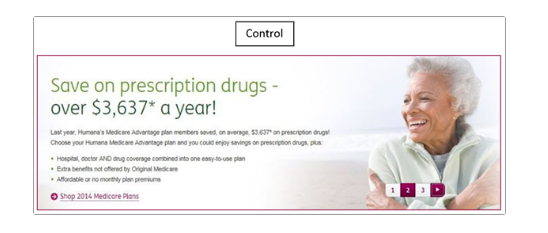

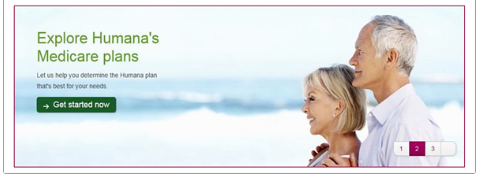

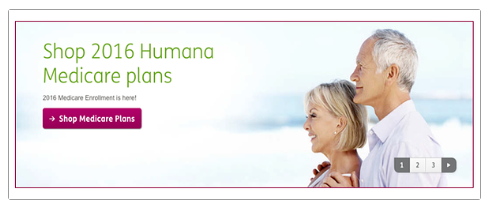


A t-test is not appropriate here. When we have one **factor**, the landing page and **three options or treatment levels** of that factor are the different versions of the landing page. The response they measured was sales.  
 
Since the response is **numeric, or continuous**, we need to use a One-Way Analysis of Variance **(ANOVA)** to analyze this test.


It is called the Analysis of Variance because it determines the effect of each treatment level on the response by taking the ratio of sums of squares.

You probably are already familiar with sums of square from the SSE or Sum of Squared error which is defined as 

$$SSE=\sum_{i=1}^n (y_i-\hat{y_i})^2 $$

And you previously learned that in a regression analysis, this measure captures the unexplained information in y. 

The statistical test in an ANOVA analysis is a F-test.  The null hypothesis is that all of the treatment means are the same.  Often we see a picture like this one:

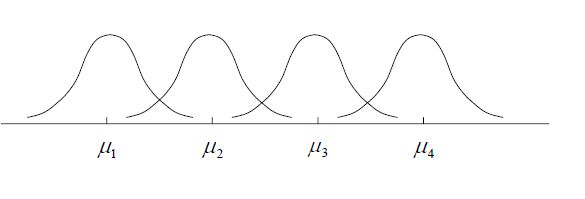

Where we assume that each treatment has its own mean.

Notice that the variation in these distributions is all equal. 

Let's think about how these individual distributions might vary:

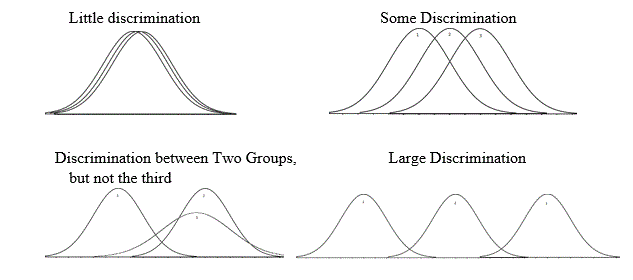

We estimate the variance of the individual distributions with SSE.  

We also know that SST (sum of squares total) which is the toal variation observed in our response is calculated as:

$$SST=\sum_{i=1}^n(y_i-\bar{y})^2 $$.

And since this is a total: 

$$ SST=SSE+SS_{treatments}$$

The previous $SSE$ formula I gave you was for a regression model.  For this test we calculate $SSE$ a bit differently.  Our goal is to estimate the variance of the individual distributions pictured above.  We will do just that.  For each treatment we will take the mean of the values of y and we will subtract that treatment mean from each of the values of y collected under that treatment. 

If we say that we have $g$ observations in each of $k$ treatment groups then the formula would look something like this:

$$ SSE=\sum_{i=1}^g \sum_{j=1}^{k_i} (y_{ij}-\bar{y_{i \dot{}}})^2 $$

And we test to see if the treatments are doing anything by comparing the $SS_{treatments}$ with the $SSE$.  If the ratio is large we say that the picture looks like the large discrimination pic above.  If the ratio is small then we say that the picture looks like little discrimination above.

Formally that is an F-test.





The null hypothesis for that test is:

$$ H_0: \mu_1=\mu_2=...=\mu_i $$

and the alternative is 

$$ H_a: \text{at least one } \mu_i \text{ is different} $$

The test statistic for the hypothesis above is defined as:

$$F=\frac{MS_{treatments}}{MSE} $$

$MS_{treatments}$ is $\frac{SS_{treatments}}{d.f.}$.  The degree of freedom in this test are very important.  They let you know if you performed the test correctly.  

For the treatments the degrees of freedom are the number of treatments-1.

The total degrees of freedom is the number of observations-1.

You can subtract to get the degrees of freedom for error.  The p-value for the test is calculated something like this:

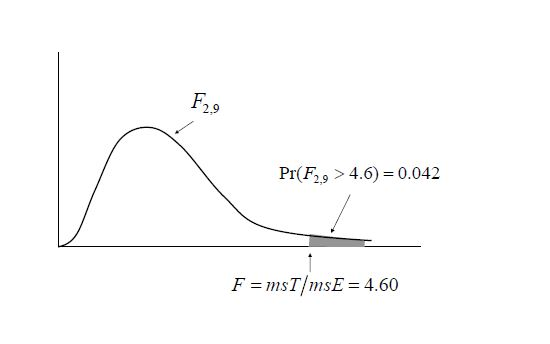

Back to the Humana example.  There are three treatments.  What will be the degrees of freedom for treatment?

The response is the total sales by hour for each of the landing pages. Read in the humana data in "humana.csv".  This contains the purchase amounts from each of the three variants of the landing page displayed above. 

In [ ]:
df<-read.csv("sample_data/humana_small.csv")
head(df)

,control,A,B
,<dbl>,<dbl>,<dbl>
1,1168.03,2134.38,1193.07
2,1374.66,1108.14,1364.11
3,1593.15,1599.48,1138.43
4,1314.15,1227.92,1328.45
5,1459.90,1591.95,1659.27
6,1497.95,506.68,1338.96


Make a box plot of the purchase amount for the three variants/treatments.  

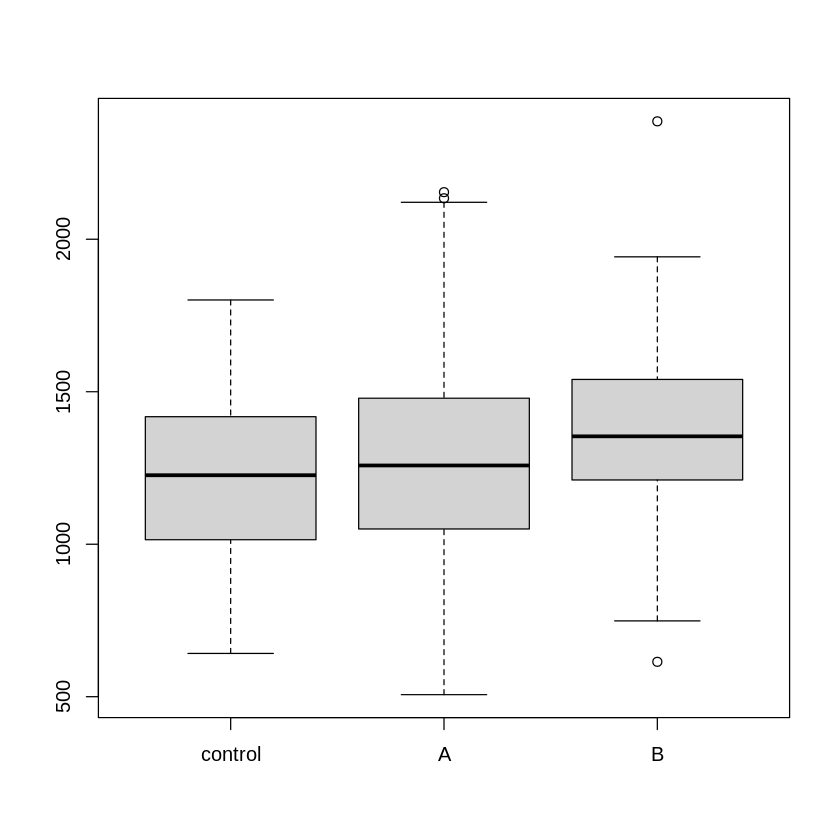

In [ ]:
boxplot(df)

Get some summary statistics.  What do you notice about this data?

In [ ]:
summary(df)

    control             A                B         
 Min.   : 641.9   Min.   : 506.7   Min.   : 614.4  
 1st Qu.:1023.1   1st Qu.:1060.1   1st Qu.:1219.5  
 Median :1226.2   Median :1258.2   Median :1353.8  
 Mean   :1231.5   Mean   :1271.3   Mean   :1369.4  
 3rd Qu.:1417.2   3rd Qu.:1478.0   3rd Qu.:1538.1  
 Max.   :1800.8   Max.   :2154.4   Max.   :2386.7  

Is this data format wide or long?  What do we need it to be?  

In [ ]:
library(tidyverse)
df_long<-df %>% pivot_longer(everything(),
names_to="variant",
values_to="sales")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Just for fun, make a boxplot and summary of the long data.

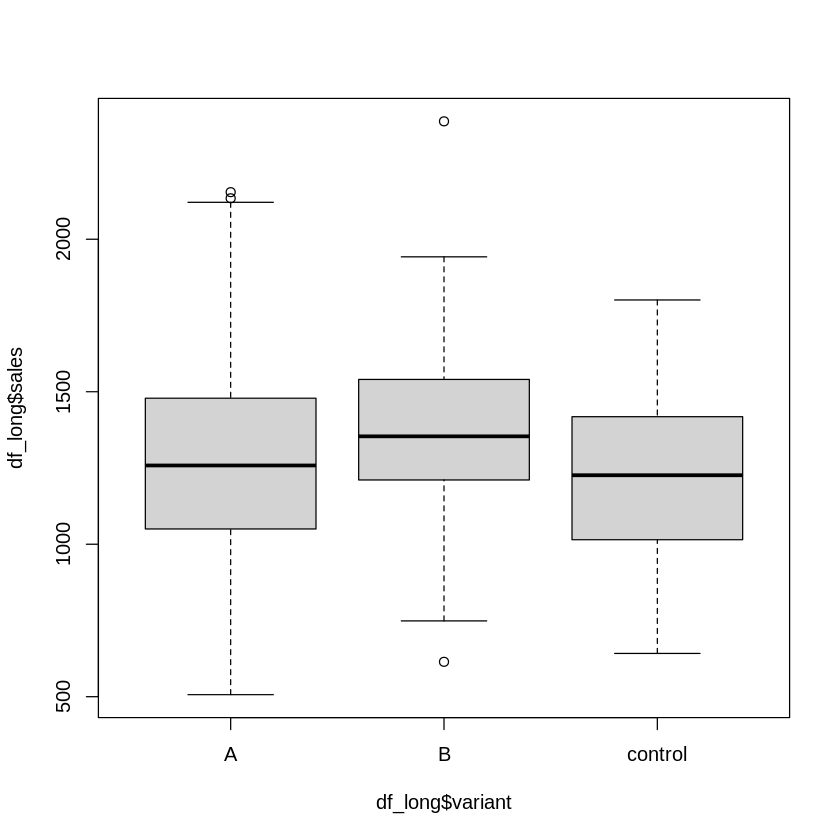

In [ ]:
boxplot(df_long$sales~df_long$variant)

In [ ]:
df_long %>% group_by(variant) %>% summarise(mean(sales), sd(sales), n())

variant,mean(sales),sd(sales),n()
<chr>,<dbl>,<dbl>,<int>
A,1271.306,339.1211,100
B,1369.440,295.7619,100
control,1231.453,285.2519,100


Let's perform an ANOVA analysis on this data and see if there is a statistical difference between these treatments.  But make sure to do that on the entire data set, not the data filtered with 0's.

In [ ]:
mod<-aov(sales~variant, data=df_long)
summary(mod)

             Df   Sum Sq Mean Sq F value  Pr(>F)   
variant       2  1008641  504320    5.33 0.00532 **
Residuals   297 28100843   94616                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

What can we conclude?

Before we get too crazy, we need to check some assumptions with this analysis.  These assumptions are essentially those from a regression model since we are really just replacing the least squares estimates with the means in a One-Way ANOVA.  What are the assumptions?



1.   
2.   
3.




What do we use to check the assumptions?

Let's do that below.

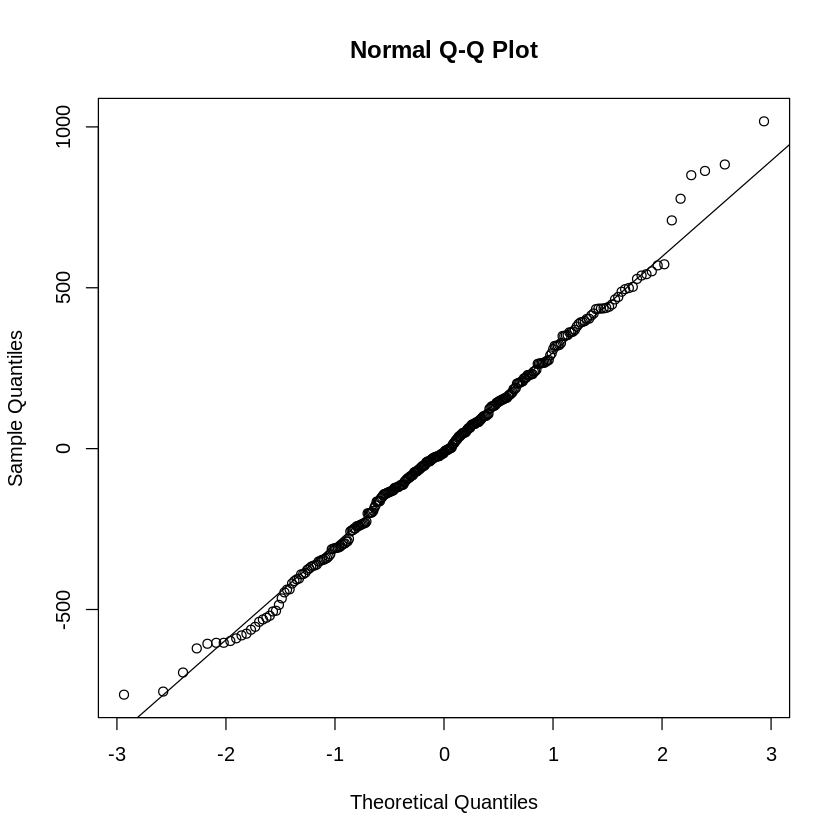

In [ ]:
qqnorm(mod$residuals)
qqline(mod$residuals)

We can make a boxplot of the residuals by the variants. 

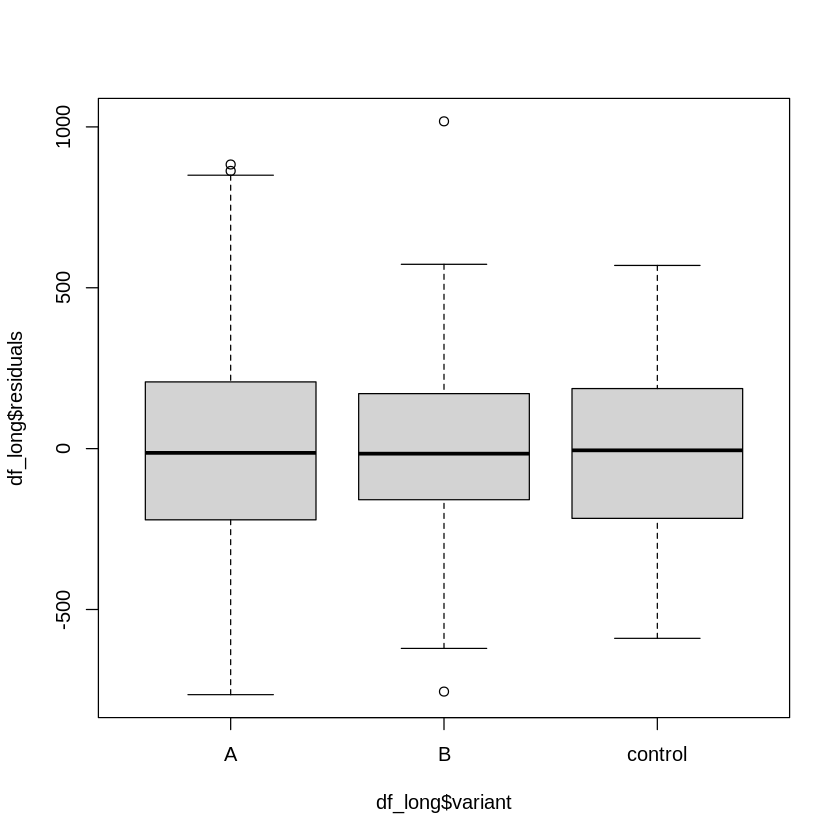

In [ ]:
df_long$residuals<-mod$residuals
boxplot(df_long$residuals~df_long$variant)

# **Comparing the Treatments**

The test above only tell us if the treatments are a significant contribution to the total variation in y.  It does not tell us which of the treatments are different from the others.

To answer that question we will need to do another test.  We will lose Tukey's Honestly Significant Difference test.


**Multiple Comparisons**

Let's stop and think about type I errors for a minute. Here is the thing, we need to think about perfoming multiple tests at one time and the implications for the ***overall type I error rate***.

**Example**: We are considering a new cleaning solvent that is a mixture of 100 chemicals. Suppose that regulations state that a mixture is safe if all of its constituents are safe (pretending we can ignore chemical interaction). We test the 100 chemicals for causing cancer, running each test at the 5% level.

What happens if all 100 chemicals are harmless and safe?

Since $α=0.05$ we would expect, on average, 5 of the 100 chemicals will be declared carcinogenic, even when all are safe.

Worse, if the tests are independent (think coin flip with an unbalanced coin) then one or more of the chemicals will be declared unsafe in 99.4% of all sets of experiments we run, even if all the chemicals are safe.

$$ P(\text{a chem declared unsafe)}=0.05$$

$$ P(\text{a chem declared safe)}=0.95 $$

$$ P(\text{at least on chem declared unsafe)} =1-P(\text{all safe})$$

$$ P(\text{all safe}) =0.95^{100}$$ 

In [ ]:
0.95^100

[1] 0.005920529

And then to calculate $P(\text{at least one chem declared unsafe})$

In [ ]:
1-0.005920529220334

[1] 0.9940795

You are basically guaranteed to find at least one chemical to be unsafe when in fact it is safe.  

We will have this same problem when we compare all of the different treatments with each other.  How many tests will you do if you test 5 treatments against each other pairwise.

In [ ]:
choose(5,2)

[1] 10

What is the probablity of making at least one type I error?

In [ ]:
1-(0.95^10)

[1] 0.4012631

# **Tukey HSD Test**

This test compares each treatment mean with all of the other treatment means.  At the same time, it controls the type I error rate.   

In [ ]:
TukeyHSD(mod)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = sales ~ variant, data = df_long)

$variant
               diff         lwr       upr     p adj
B-A         98.1344   -4.332626 200.60143 0.0637830
control-A  -39.8532 -142.320226  62.61383 0.6305167
control-B -137.9876 -240.454626 -35.52057 0.0047485


From this output we see that A is not different from the control.  B is larger than the control.  A is not different from the control and A and B are marginally different.  

**What do you think we could do to see if A and B are different?**

Some comments on this test:


*   The results are not transitive
*   Sometimes the data is too noisy (or not enough samples) to tell the treatments apart from each other.
* This test should only be performed in the F-test in the ANOVA shows a significant treatment effect.



# **A/B/n test for Proportions**

What if in the humana example the measurement or KPI was clicks or sign ups?  This is a rate, a binary variable.

Read in the humana_rate.csv.  Make a summary of the data. Reformat the data if necessary.

In [ ]:
df<-read.csv("sample_data/humana_rate.csv")
head(df)

,control,A,B
,<int>,<int>,<int>
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,1,0,0
6,0,1,0


In [ ]:
library(tidyverse)

df_long <- df %>% pivot_longer(
  everything(),
  names_to="variant",
  values_to="clicks"
)

In [ ]:
df_long %>% group_by(variant, clicks) %>% summarise(n = n()) %>%
mutate(freq = n / sum(n))

`summarise()` has grouped output by 'variant'. You can override using the
`.groups` argument.


variant,clicks,n,freq
<chr>,<int>,<int>,<dbl>
A,0,1326,0.94714286
A,1,74,0.05285714
B,0,1328,0.94857143
B,1,72,0.05142857
control,0,1346,0.96142857
control,1,54,0.03857143


We can make a plot. 

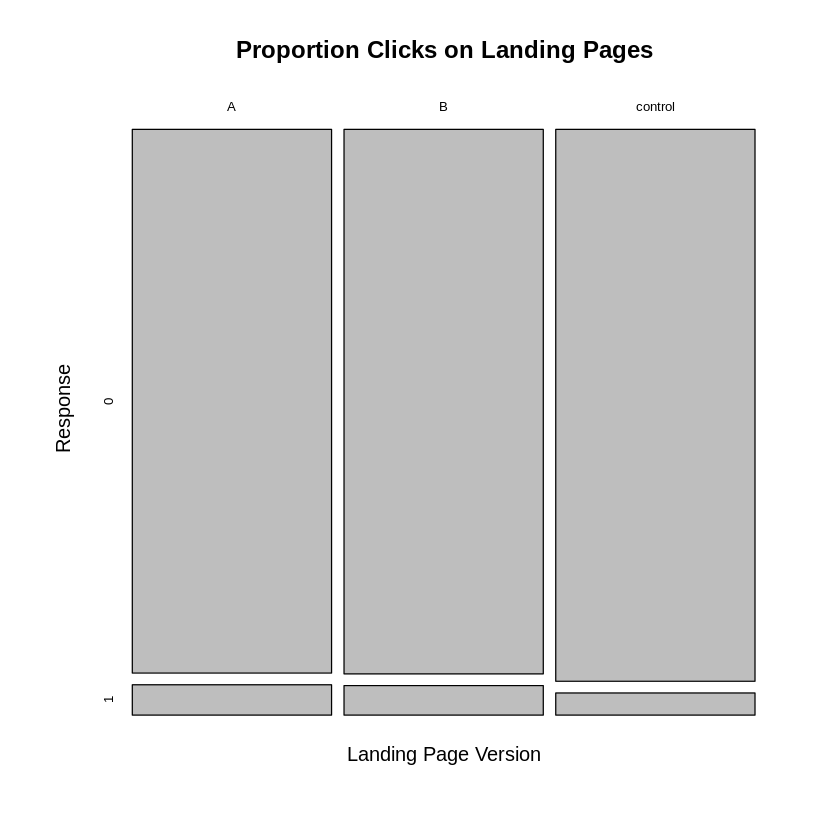

In [ ]:
mosaicplot(table(df_long$variant, df_long$clicks), main="Proportion Clicks on Landing Pages", ylab = "Response", xlab = "Landing Page Version")

We can't use an ANOVA, we will not be studying means. We want to know the proportion of clicks depend on the landing page.  

To test this we can use a Chi-square test of proportions. Recall in Chi-square test the null hypothesis is that the counts are independent of the version. The alternative is the counts are dependent.

The test statistic is computed by the data contained in each cell. 
 
$$ \chi^2 =\frac{(O-E)^2}{E}$$


Where E=expected values based on independence and O=observed value in the table.  We know that if two events are independent then 
 
$$ P(A \text{and} B)= P(A)P(B) $$

And calculated by: $$\frac{\text{Row Total} * \text{Column Total}}{\text{Table Total}} $$
 
The expected values are calculated using the marginal probabilities of A and B. Then we compare that with the observed values.  If the observed values are very different from what would be expected given independence then we conclude there is a dependence. 
 
To do this in R you use chisq.test().  



We are testing to see if the counts are different by each treatment.  If they were the same then we would expect an "even" proportion in each group.  The p vector required for the chisq.test() function is the expected proportion by total count.

In [ ]:
table(df_long$variant, df_long$clicks)

         
             0    1
  A       1326   74
  B       1328   72
  control 1346   54

In [ ]:
test<-chisq.test(table(df_long$variant, df_long$clicks), correct = FALSE)
test


	Pearson's Chi-squared test

data:  table(df_long$variant, df_long$clicks)
X-squared = 3.822, df = 2, p-value = 0.1479


Here are the expected values.

In [ ]:
test$expected

,0,1
A,1333.333,66.66667
B,1333.333,66.66667
control,1333.333,66.66667


Calculate the $\chi^2$ statistic. 

In [ ]:
test$observed

         
             0    1
  A       1326   74
  B       1328   72
  control 1346   54

The degrees of freedom for the test are the (rows-1)*(columns-1).  In this case we had 3 rows and two columns (look at the table above) so the d.f.=2.  

What is the conclusion?

If there was a difference then what?  How do we know which version to go with?